## Logistic Regression with Neural Network Mindset

In [8]:
import numpy as np

In [256]:
class LogisticRegression:
    
# Here we are initialising cost, epochs and learning rate
    def __init__(self,learning_rate=0.001,epochs=2000):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.cost = []
        
# Defining sigmoid function which is basically used for binary classification problems or the problems in which
# output belongs to 2 classes
    def sigmoid(self,z):
        a=1/(1+np.exp(-z))
        return a
        
# Here we are initializing weights anf bias weights=(n,1) --> dimensions of weight vector n are the number of features
    def initialize_weights(self):
        self.weights = np.zeros((self.dim,1),dtype='float')
        self.bias = 0.0
        
# In forward propagation we first we calculated the weighted sum by the formula z = w.T . X + bias
# i.e dot product of weights and training data. we have transposed the weight vector to (1,n) dimensions so that it can
# multiplied by the training data which is having dimension (n,m)
# dimensions of output are (1,m)
# after calculating the weighted sum we passesd the output to the sigmoid function which brings the outputs in the range
# of (0,1)
    def forward_propagate(self):
        self.z = np.dot(self.weights.T,self.x_train) + self.bias
        self.a = self.sigmoid(self.z)
        
# now we comput the cost for that we are using formula J= - y log a - (1-y) log (1-a) / m
    def compute_cost(self):
        self.cost.append((-1*(np.sum(self.y_train*np.log(self.a)+(1-self.y_train)*np.log(1-self.a))))/self.m)
        
# Now we we do backpropagation to update weights 
# after derivation cost function with weight we found that derivative is (A-Y).X
# Curly ()
    def update_weights(self):
        self.dw = np.dot(self.x_train,(self.a-self.y_train).T)/self.m
        self.db = sum(self.a-self.y_train)/self.m
        self.weights = self.weights - self.learning_rate * self.dw
        self.bias = self.bias - self.learning_rate * self.db
        
# In this function we are fitting our dataset to the model that we have created       
    def fit(self,x,y):
#         print('Hello')
        x_train = x / 255
        self.m = x_train.shape[0]
        self.x_train = x_train.reshape(x_train.shape[0],-1).T
        self.y_train = y.reshape(1,y.shape[0])
        self.dim = self.x_train.shape[0]
        
        
        self.initialize_weights() # Initializing weights and biases
        
        for i in range(self.epochs):
            
            self.forward_propagate()
            
            self.compute_cost()
#             print(f"epoch->{i+1} loss->{self.cost[i]}")
            
            self.update_weights()
            
    def predict(self,x):
        x_test = x.reshape(x.shape[0]*x.shape[1]*x.shape[2],1)
        z=np.dot(self.weights.T,x_test) + self.bias
        a=self.sigmoid(z)
#         print(np.min(a[0]))
        if np.min(a[0]) > 0.5:
            print(f"It is a cat with an accuracy of {np.min(a[0]) * 100}")
        else:
            print(f"It's not a cat with an accuracy of {(1-np.min(a[0]))*100}")
            
        
        
        

In [257]:
import h5py
hf = h5py.File('train_catvnoncat.h5','r')
X_train = np.array(hf['train_set_x'])

Y_train = np.array(hf['train_set_y'])

In [279]:
model = LogisticRegression(learning_rate=0.001,epochs=2000)
model.fit(X_train,Y_train)

It is a cat with an accuracy of 100.0


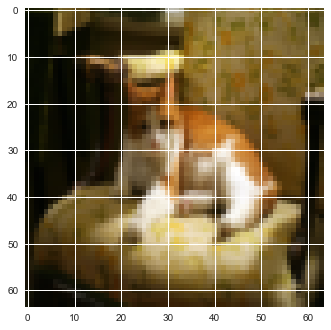

In [289]:
img = X_train[7]
model.predict(img)
plt.imshow(X_train[7])

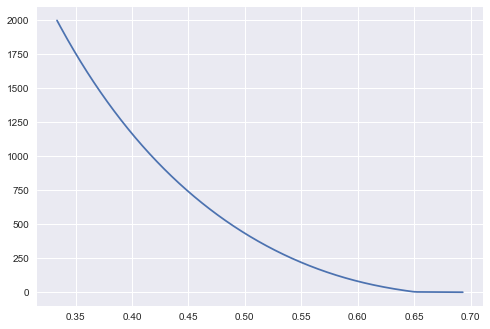

In [281]:
epochs=[i for i in range(model.epochs)]
plt.style.use('seaborn')
plt.plot(model.cost,epochs)

In [266]:
print(min(model.cost))

0.5068006849720806
